In [1]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path
project_root = Path().resolve().parent.parent  
sys.path.append(str(project_root))

In [2]:
from langgraph.graph import StateGraph,END,START
from backend.model.states.graph_state.GraphState import GraphState
from IPython.display import Image, display

ModuleNotFoundError: No module named 'backend'

In [ ]:
from langgraph.graph import StateGraph, START, END
from backend.model.states.graph_state.GraphState import GraphState
from backend.nodes.qa_node.no_kb_agent import no_kb_agent
from backend.nodes.qa_node.rag_agent import rag_agent
from backend.nodes.utils.chat_agent import chat_agent
from backend.graph.qa_graph.get_pdf_ready_pipeline import get_pdf_ready_pipeline
from backend.graph.qa_graph.rag_router import rag_router
from backend.graph.qa_graph.upload_check_router import upload_check_router


def build_qa_graph(state:GraphState):
    graph = StateGraph(GraphState)

    graph.add_node("upload_check_router", upload_check_router)
    graph.add_node("get_pdf_ready_pipeline", get_pdf_ready_pipeline)
    graph.add_node("router", lambda state: state)
    graph.add_node("rag_agent", rag_agent)
    graph.add_node("chat_agent", chat_agent)
    graph.add_node("no_kb_agent", no_kb_agent)

    graph.add_edge(START, "upload_check_router")
    graph.add_edge("get_pdf_ready_pipeline", "router")

    graph.add_conditional_edges(
        "router",
        rag_router,
        {
            "TRUE": "rag_agent",
            "FALSE": "chat_agent",
            "NO_KB": "no_kb_agent",
        },
    )
    graph.add_conditional_edges(
        "upload_check_router",
        upload_check_router,
        {
            "TRUE": "get_pdf_ready_pipeline",
            "FALSE": "chat_agent",
        },
    )

    graph.set_entry_point("upload_check_router")
    graph.set_finish_point("no_kb_agent")
    graph.set_finish_point("rag_agent")


    app= graph.compile()
    display(Image(app.get_graph().draw_mermaid_png()))

    return app


2025-10-05 14:28:43.680 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:28:43.683 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:28:43.684 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-05 14:28:43.685 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


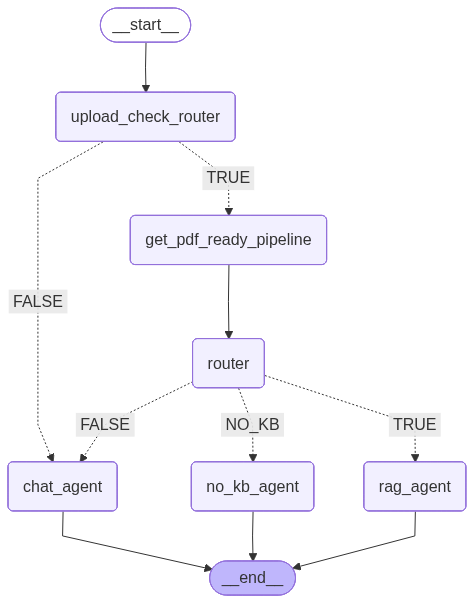

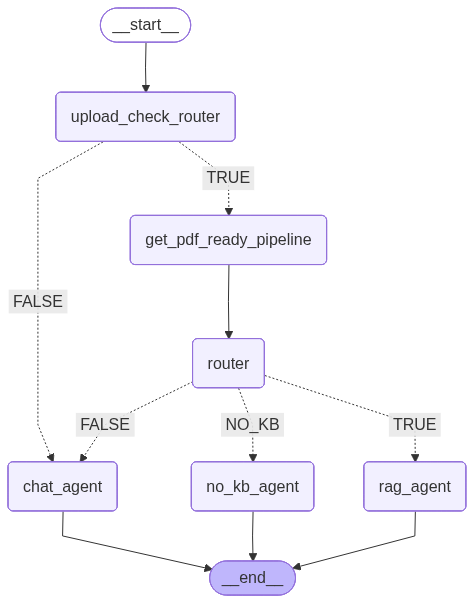

In [ ]:
load_dotenv()
doc_path = os.getenv("doc_path")
doc_name = os.getenv("doc_name")


state = GraphState()
state.qa_state.doc_path = doc_path
build_qa_graph(state)